# Mawrth_Vallis

In this series of note(book)s we are going to review the library using Mars Mawrth Vallis (https://en.wikipedia.org/wiki/Mawrth_Vallis) as instrument-data.

Mawrth Vallis (_MMV_ hereafter) is centered at (approx) 22.5<sup>o</sup>,343.5<sup>o</sup> (lat,lon; C180+E).
Let's define the region of interest as a box of **2** degrees sides around those coordinates:

In [1]:
bbox = {
    'minlat': 21.5,
    'maxlat': 23.5,
    'westlon': 342.5-360,
    'eastlon': 344.5-360
}

## Data query

The we are eventually going to download comes from USGS/PDS; to know where the data is available for download (ie, URL),
we query USGS' ODE (https://ode.rsl.wustl.edu/) servers.
All those quirks -- query, retrieve, select, etc. -- are implemented in the lib.

First thing we do is to query what are the datasets the (NPT) lib supports; And then we go query for them products.

In [2]:
import npt

npt.datasets.list()

['mars/mex/hrsc/rdrv3',
 'mars/mex/hrsc/refdr3',
 'mars/mro/ctx/edr',
 'mars/mro/hirise/rdrv11']

### CTX

In [3]:
query_results_ctx = npt.search.ode(dataset='mars/mro/ctx/edr', bbox=bbox, match='intersect')

76 products found


In [4]:
query_results_ctx.sample(5)

,id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,geometry,image_url,label_url,browse_url
68,N05_064208_2022_XN_22N017W,MRO,CTX,EDR,MARS,False,5.68,22.0537,342.6394,342.94,...,63.88,179.44,2020-04-07T14:28:19.921,2020-09-21T21:43:08.000,2020-04-07T14:28:13.195,2020-04-07T14:28:26.647,"POLYGON ((-17.15000 22.44030, -17.06000 21.726...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None
50,J19_052076_2024_XI_22N015W,MRO,CTX,EDR,MARS,False,5.94,22.2044,344.6864,345.3,...,50.75,56.84,2017-09-05T07:00:07.145,2018-01-31T22:19:17.000,2017-09-05T06:59:18.140,2017-09-05T07:00:56.151,"POLYGON ((-15.40000 24.83120, -14.70000 19.634...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None
69,N09_065817_2037_XN_23N017W,MRO,CTX,EDR,MARS,False,5.71,23.487,342.2358,342.54,...,62.14,255.9,2020-08-10T23:12:12.679,2021-01-08T23:59:23.000,2020-08-10T23:12:05.953,2020-08-10T23:12:19.406,"POLYGON ((-17.54000 23.86870, -17.46000 23.154...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None
51,J19_052274_2023_XN_22N017W,MRO,CTX,EDR,MARS,False,6.79,22.1036,342.2308,342.58,...,18.35,63.59,2017-09-20T17:17:27.925,2018-01-31T22:26:46.000,2017-09-20T17:17:21.199,2017-09-20T17:17:34.652,"POLYGON ((-17.50000 22.48990, -17.42000 21.776...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None
2,P06_003208_2046_XN_24N017W,MRO,CTX,EDR,MARS,False,5.67,24.4055,342.6312,343.2,...,64.36,212.17,2007-04-03T10:12:52.088,2007-11-05T19:42:35.000,2007-04-03T10:12:05.965,2007-04-03T10:13:38.211,"POLYGON ((-17.43000 26.87630, -16.80000 21.994...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None


### HiRISE

In [5]:
query_results_hirise = npt.search.ode(dataset='mars/mro/hirise/rdrv11', bbox=bbox, match='intersect')

43 products found


In [6]:
query_results_hirise.sample(5)

,id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,geometry,image_url,label_url,browse_url
14,ESP_039391_2025_RED,MRO,HIRISE,RDRV11,MARS,False,0.5,22.1348,344.521,344.583,...,60.467139,257.071087,2014-12-21T20:41:40.541,2014-12-31T03:34:02.000,2014-12-21T20:41:38.260,2014-12-21T20:41:42.822,"POLYGON ((-15.41700 22.02020, -15.51100 22.010...",https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...
29,ESP_052854_2020_RED,MRO,HIRISE,RDRV11,MARS,False,0.25,21.7856,342.8565,342.915,...,50.682569,83.336904,2017-11-04T22:03:43.851,2017-11-09T00:49:39.000,2017-11-04T22:03:42.451,2017-11-04T22:03:45.251,"POLYGON ((-17.08500 21.71850, -17.18200 21.707...",https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...
33,ESP_055399_2020_RED,MRO,HIRISE,RDRV11,MARS,False,0.25,21.7513,342.475,342.537,...,54.388705,179.783087,2018-05-22T05:28:36.254,2018-05-31T04:11:19.000,2018-05-22T05:28:33.981,2018-05-22T05:28:38.527,"POLYGON ((-17.46300 21.63730, -17.55600 21.627...",https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...
13,ESP_038626_2025_RED,MRO,HIRISE,RDRV11,MARS,False,0.5,22.1774,344.13,344.192,...,65.300548,219.505384,2014-10-23T06:25:00.451,2014-10-30T00:28:38.000,2014-10-23T06:24:58.184,2014-10-23T06:25:02.718,"POLYGON ((-15.80800 22.06380, -15.90000 22.053...",https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...
32,ESP_054977_2025_RED,MRO,HIRISE,RDRV11,MARS,False,0.25,22.2979,342.457,342.519,...,50.808864,161.779853,2018-04-19T08:21:45.510,2018-04-26T10:22:37.000,2018-04-19T08:21:43.231,2018-04-19T08:21:47.790,"POLYGON ((-17.48100 22.18390, -17.57400 22.173...",https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...


### HRSC

In [7]:
query_results_hrsc = npt.search.ode(dataset='mars/mex/hrsc/refdr3', bbox=bbox, match='intersect')

13 products found


In [8]:
query_results_hrsc.sample(5)

,id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,geometry,image_url,label_url,browse_url
11,HC423_0000_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,25,28.569,343.1755,344.942,...,None,None,2013-10-10T06:47:18.351,2016-10-28T15:11:46.000,2013-10-10T06:45:02.353,2013-10-10T06:49:34.350,"POLYGON ((-17.45700 20.75900, -17.46700 21.027...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...
4,H2938_0000_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,25,29.7285,345.477,347.52,...,None,None,2006-04-25T08:17:23.111,2016-04-08T13:52:43.000,2006-04-25T08:14:53.634,2006-04-25T08:19:52.588,"POLYGON ((-12.48000 37.05600, -12.49600 36.881...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...
8,H5181_0000_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,12.5,23.7499,342.9397,343.621,...,None,None,2008-01-14T03:11:36.454,2016-04-27T02:54:28.000,2008-01-14T03:10:31.461,2008-01-14T03:12:41.448,"POLYGON ((-16.37900 27.95200, -16.38300 27.552...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...
10,HA359_0000_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,50,6.0099,343.0495,344.209,...,None,None,2012-02-17T04:21:32.941,2016-10-27T09:57:31.000,2012-02-17T04:17:12.415,2012-02-17T04:25:53.468,"POLYGON ((-17.22000 -10.29900, -17.22200 -10.0...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...
3,H2229_0001_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,25,19.4905,341.7115,344.19,...,None,None,2005-10-08T21:12:22.102,2016-03-14T22:12:55.000,2005-10-08T21:09:40.594,2005-10-08T21:15:03.611,"POLYGON ((-19.07600 11.60600, -19.08500 11.771...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...


## Visualize footprints

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [40, 20]

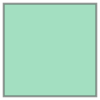

In [10]:
import shapely

bbox_polygon = shapely.geometry.box(
    bbox['westlon'], 
    bbox['minlat'], 
    bbox['eastlon'], 
    bbox['maxlat']
)

bbox_polygon

In [11]:
from pandas import concat
from geopandas import GeoDataFrame

gdf = GeoDataFrame(concat([
        query_results_hrsc,
        query_results_ctx,
        query_results_hirise,
    ],ignore_index=True))

In [12]:
def plot_geometries(gdf, ref_polygon=None, ref_label='Ref-Polygon'):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()

    polygon_lgd = None
    if ref_polygon:
        polygon_plt = ax.plot(*ref_polygon.exterior.xy, c='yellow')
        polygon_lgd = plt.legend(polygon_plt, [ref_label], loc=2)

    gdf.plot(alpha=0.5, edgecolor='red', column='inst',
             legend=True, legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, 
             figsize=(24,16), ax=ax)

    if polygon_lgd:
        ax.add_artist(polygon_lgd)
        
    return ax

<AxesSubplot:>

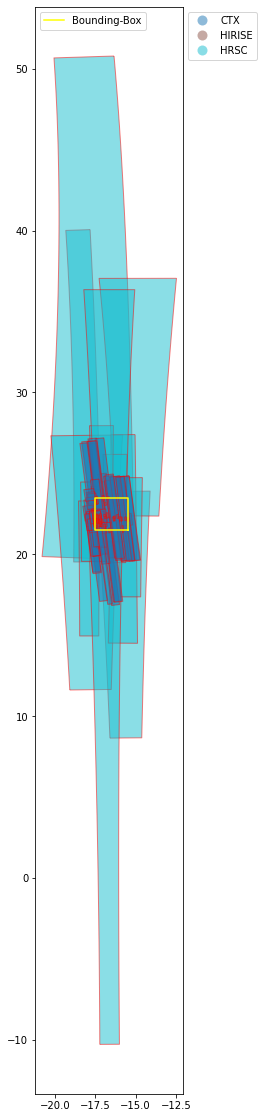

In [13]:
plot_geometries(gdf, bbox_polygon, 'Bounding-Box')

In [14]:
gdf.to_file('Mawrth_Vallis_ODE_products_intersect.geojson', driver='GeoJSON', index=False)

## Conclusion

We went through the selection of Mars image products -- more specifically, their footprints -- as provided by USGS/PDS/ODE' database. The whole of querying, filtering, selection, and metadata formating is implemented in NPT' `search` module.

Keypoints in the process (implemented in the internals of the library) are:

- ODE search interface understands geographical longitude coordinates in the range [0:360]. Accordingly, results (lon) coordinates are also in the same (0:360) range;
- Some footprints returned by ODE are of (shapely) formats *different from Polygon*: *GeometryCollection* or *MultiPolygon*. The reason is unknown to me, most probably some bug/lack of data validation in their pipeline.
  * NPT fixes that by "casting" those (wrong) geometries to their _envelope Polygon_;
- As in the example data here downloaded, some geometries do not properly represent the respective image (as you can see in the plot above): polygon is partially "empty". NPT does *not* fix those issues.

See the appendix section below for a summary of this notebook on retrieving on footprints *inside* the bounding-box.

## Appendix

### Selection of fully contained image products/footprints

In [15]:
query_results_ctx = npt.search.ode(dataset='mars/mro/ctx/edr', bbox=bbox, match='contain')
query_results_hirise = npt.search.ode(dataset='mars/mro/hirise/rdrv11', bbox=bbox, match='contain')
query_results_hrsc = npt.search.ode(dataset='mars/mex/hrsc/refdr3', bbox=bbox, match='contain')

gdf = GeoDataFrame(concat([
        query_results_hrsc,
        query_results_ctx,
        query_results_hirise,
    ],ignore_index=True))

3 products found
26 products found
0 products found


<AxesSubplot:>

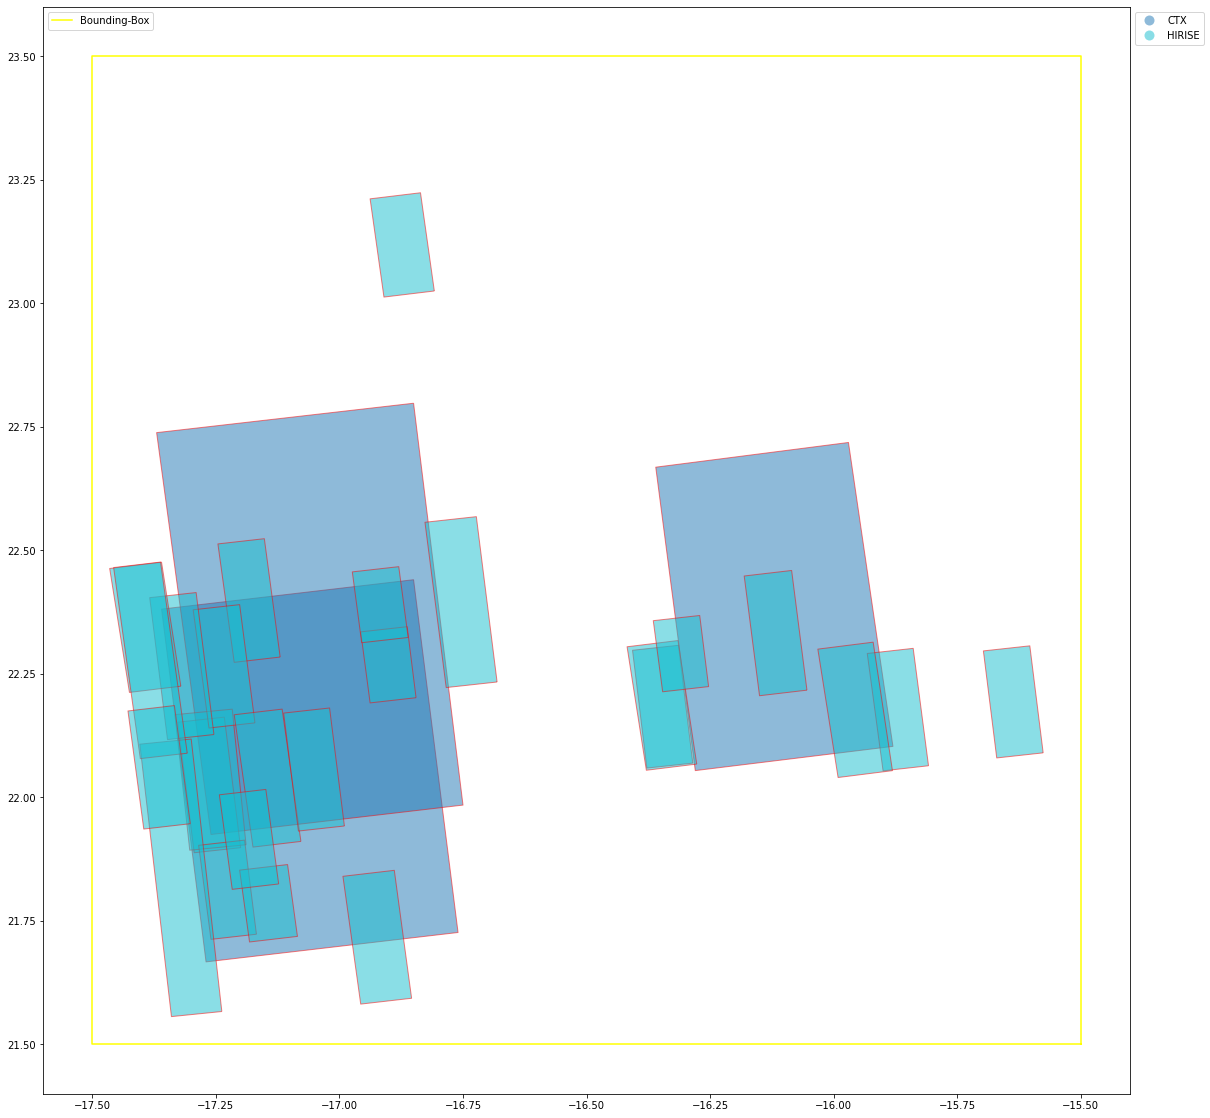

In [16]:
plot_geometries(gdf, bbox_polygon, 'Bounding-Box')

In [17]:
# gdf.to_file('Mawrth_Vallis_ODE_products_contain.geojson', driver='GeoJSON', index=False)